# Time Series Decomposition & Analysis Assignment

In [1]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import the monthly sunspots data set into a Pandas dataframe, and convert the Month field to a datetime data type.

In [2]:
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%203/monthly-sunspots.csv'

sun_df = pd.read_csv(url)

In [3]:
sun_df['Month'] = pd.to_datetime(sun_df['Month'])

In [4]:
sun_df.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


### Use a line chart to plot the time series.

In [5]:
px.line(sun_df, x='Month', y='Sunspots')

### Decompose the time series and add columns for the trend, seasonality, and residuals to the data set.

In [6]:
sunspots = sun_df.set_index('Month')

In [7]:
decomposition = sm.tsa.seasonal_decompose(sunspots, model='additive', freq=132)

In [8]:
trend = decomposition.trend
trend = trend.reset_index()
px.line(trend, x='Month', y='Sunspots', title='Trend')

In [9]:
seasonality = decomposition.seasonal.reset_index()
px.line(seasonality, x='Month', y='Sunspots', title='Seasonality')

In [10]:
residuals = decomposition.resid.reset_index()
px.line(residuals, x='Month', y='Sunspots', title='Residuals')

### Plot the observed values, trend, seasonality, and residuals on a multi-line chart. You should have a line for each column.

**Hint:** You may need to melt the data so that all the categories are in a single column and all the values are in a single column.

In [11]:
concat = pd.concat([sun_df, trend['Sunspots'], seasonality['Sunspots'], residuals['Sunspots']], 1)
concat.columns = ['Date', 'Observed', 'Trend', 'Seasonality', 'Residual']

In [12]:
melted = pd.melt(concat, id_vars='Date',
                 value_vars=['Observed', 'Trend', 'Seasonality', 'Residual'],
                 var_name='Variable',
                 value_name='Value')
melted.head()

,Date,Variable,Value
0,1749-01-01,Observed,58.0
1,1749-02-01,Observed,62.6
2,1749-03-01,Observed,70.0
3,1749-04-01,Observed,55.7
4,1749-05-01,Observed,85.0


In [13]:
px.line(melted, 'Date', 'Value', color='Variable', 
        title='Sunspot- Observed, Trend, Seasonality, and Residuals',
        template='none')

### Add two columns to the data set - one that calculates a rolling mean and another that calculates a rolling standard deviation.

In [14]:
concat['Rolling_Mean'] = concat['Observed'].rolling(window=132).mean()
concat['Rolling_STD'] = concat['Observed'].rolling(window=132).std()

### Plot the rolling mean and standard deviation on a multi-line chart along with the observed values.

In [15]:
rolling_melted = pd.melt(concat, id_vars='Date',
                 value_vars=['Observed', 'Rolling_Mean', 'Rolling_STD'],
                 var_name='Variable',
                 value_name='Value')
rolling_melted.head()

,Date,Variable,Value
0,1749-01-01,Observed,58.0
1,1749-02-01,Observed,62.6
2,1749-03-01,Observed,70.0
3,1749-04-01,Observed,55.7
4,1749-05-01,Observed,85.0


In [16]:
px.line(rolling_melted, 'Date', 'Value', color='Variable', 
        title='Sunspots- Rolling Mean and Rolling STD',
        template='none')

### Perform an Augmented Dickey Fuller Test on the data set and determine whether this time series is stationary.

In [17]:
adf_test = sm.tsa.stattools.adfuller(sun_df['Sunspots'])

In [18]:
results = pd.Series(adf_test[0:4],
                    index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])

for key, value in adf_test[4].items():
  results['Critical Value (%s)'%key]= value

results.map('{:,.19f}'.format)

ADF Test Statistic         -9.5676675119130756286
P-Value                     0.0000000000000002333
# Lags Used                27.0000000000000000000
# Observations Used     2,792.0000000000000000000
Critical Value (1%)        -3.4326943131688949506
Critical Value (5%)        -2.8625757527263959723
Critical Value (10%)       -2.5673213632123297323
dtype: object

### Generate an autocorrelation plot for the data set to determine the level of autocorrelation in this time series.

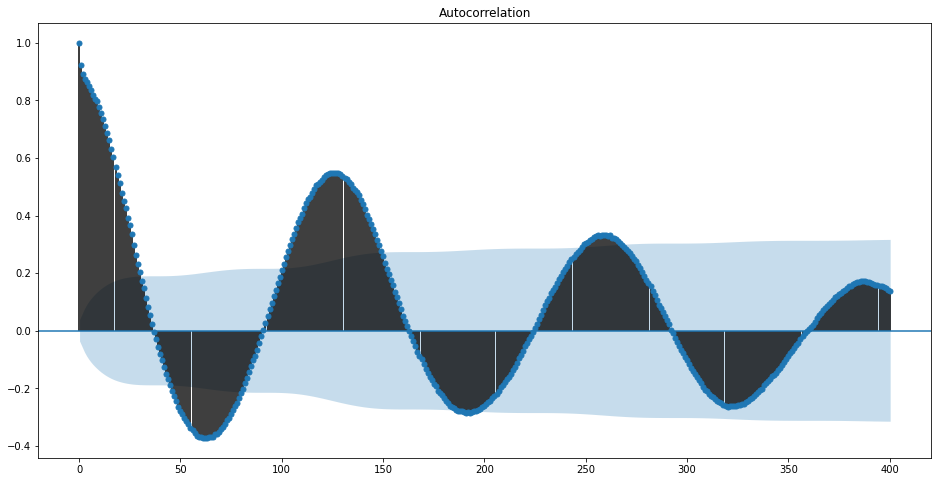

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

fig = plot_acf(sunspots, lags=400)

#Lecture Notes

In [120]:
df = pd.read_csv('/content/AAPL.csv')

In [121]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014
1,2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757
2,2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928
3,2010-06-08,35.6186,249904415,36.1771,36.2571,35.0928
4,2010-06-09,34.7428,213040094,35.9243,35.9857,34.6414


In [122]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]

In [123]:
px.line(df, 'Date', 'Close', title='APPL Closing Prices', template='none')

In [124]:
series = df.set_index('Date')

In [125]:
decomposition = sm.tsa.seasonal_decompose(series, model='additive', freq=252)

trend = decomposition.trend.reset_index()
seasonal = decomposition.seasonal.reset_index()
residuals = decomposition.resid.reset_index()

In [129]:
merged = df.merge(trend, on='Date')
merged = merged.merge(seasonal, on='Date')
merged = merged.merge(residuals, on='Date')
merged.columns = ['Date', 'Observed', 'Trend', 'Seasonal', 'Residuals']
merged.head()

,Date,Observed,Trend,Seasonal,Residuals
0,2010-06-03,37.5886,NaN,0.966307,NaN
1,2010-06-04,36.5664,NaN,1.008828,NaN
2,2010-06-07,35.8486,NaN,0.976376,NaN
3,2010-06-08,35.6186,NaN,0.387145,NaN
4,2010-06-09,34.7428,NaN,-0.174811,NaN


In [130]:
melted = pd.melt(merged, id_vars='Date', 
                 value_vars=['Observed', 'Trend', 'Seasonal', 'Residuals'],
                 var_name='Variable',
                 value_name='Value',
                 )

melted.head()

,Date,Variable,Value
0,2010-06-03,Observed,37.5886
1,2010-06-04,Observed,36.5664
2,2010-06-07,Observed,35.8486
3,2010-06-08,Observed,35.6186
4,2010-06-09,Observed,34.7428


In [132]:
px.line(melted, 'Date', 'Value', color='Variable', title='Observed vs Components', template='none')

In [133]:
merged['Rolling_Mean'] = merged['Observed'].rolling(window=252).mean()
merged['Rolling_STD'] = merged['Observed'].rolling(window=252).std()

In [134]:
melted = pd.melt(merged, id_vars='Date', 
                 value_vars=['Observed', 'Rolling_Mean', 'Rolling_STD'],
                 var_name='Variable',
                 value_name='Value',
                 )

melted.head()

,Date,Variable,Value
0,2010-06-03,Observed,37.5886
1,2010-06-04,Observed,36.5664
2,2010-06-07,Observed,35.8486
3,2010-06-08,Observed,35.6186
4,2010-06-09,Observed,34.7428


In [135]:
px.line(melted, 'Date', 'Value', color='Variable', title='Rolling Mean vs STD', template='none')

In [137]:
adf_test = sm.tsa.stattools.adfuller(merged['Observed'])
adf_test

(0.635206667371746,
 0.9884520189151633,
 26,
 2490,
 {'1%': -3.4329789374204935,
  '10%': -2.5673882843825098,
  '5%': -2.8627014485379787},
 11794.552235233201)

In [138]:
results = pd.Series(adf_test[0:4],
                    index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])

for key, value in adf_test[4].items():
  results['Critical Value (%s)'%key]= value

print(results)

ADF Test Statistic         0.635207
P-Value                    0.988452
# Lags Used               26.000000
# Observations Used     2490.000000
Critical Value (1%)       -3.432979
Critical Value (5%)       -2.862701
Critical Value (10%)      -2.567388
dtype: float64


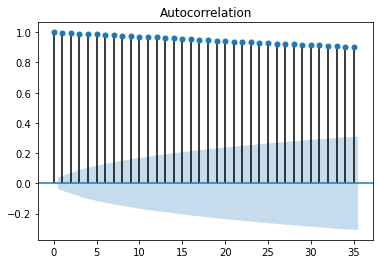

In [140]:
series = df.set_index('Date')
fig = plot_acf(series)
